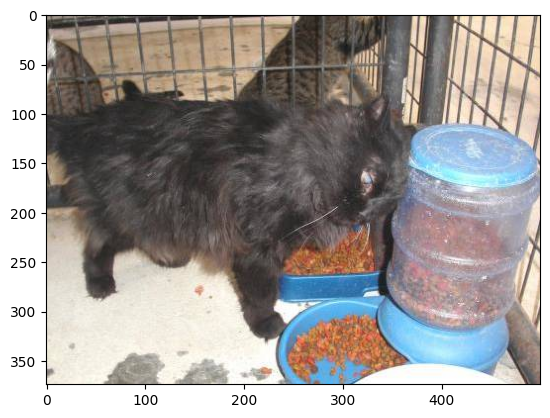

We predict this picture to ""DOG"" 



In [2]:
# problem 1
# Step1: 輸入數字
flag = True # 用來標記是否輸入成功 (有符合要求)
while flag:
    try:
        num = int(input("請選擇想顯示之圖片編號(1-20):"))
        flag = False
        
        # 只允許 1-20
        if num > 20 or num < 1:
            raise ValueError('不符合數字範圍')
    except ValueError as msg:
        print(msg)
        flag = True
    except:
        print("Error input! Please try again")
        flag = True
    
print()

# Step2: 顯示圖片 picn.jpg
import cv2
from matplotlib import pyplot as plt
filename = "./test/pic" + str(num) + ".jpg" # 檔案路徑
img = cv2.imread(filename) # 透過檔案路徑讀出圖片
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 轉成RGB形式
plt.imshow(image_rgb) # 顯示圖像
plt.show()

# Step 3: 相似度
# Base information for input picture
import numpy as np

def distance(neighbors,img): # 套用規定的距離公式
    img = cv2.resize(img, (64,64)) # 改變圖片大小
    (R, G, B) = cv2.split(img) # 3 channel
    
    dis = []
    for i in range(1,51):
        filename = "./reference/cats/cat." + str(i) + ".jpg" # 檔案路徑
        filename_dog = "./reference/dogs/dog." + str(i) + ".jpg" # 檔案路徑
        
        image = cv2.imread(filename) # 透過檔案路徑讀出圖片
        image = cv2.resize(image, (64,64)) # 改變圖片大小
        (r, g, b) = cv2.split(image) # 3 channel
        Dimage = cv2.imread(filename_dog) # 透過檔案路徑讀出圖片
        Dimage = cv2.resize(Dimage, (64,64)) # 改變圖片大小
        (dr, dg, db) = cv2.split(Dimage) # 3 channel
        
        sum_cat = 0; sum_dog = 0
        sum_cat = sum_cat + np.absolute(b - B) + np.absolute(g - G) + np.absolute(r - R)
        sum_dog = sum_dog + np.absolute(db - B) + np.absolute(dg - G) + np.absolute(dr - R)
        sum_cat = np.sum(sum_cat)
        sum_dog = np.sum(sum_dog)
        sum_cat /= (64*64*3)
        sum_dog /= (64*64*3)
        dis.append(("cat" + str(i), sum_cat))
        dis.append(("dog" + str(i), sum_dog))

    dis = sorted(dis, key = lambda x: x[1])
    return dis[:neighbors]
    
    
predict = [] # cat = 1, dog = 0
def output(img, k =3):   # send different k to test , default is 3
    neighbor = distance(k,img)
    #print(neighbor) # check , can ignore it.

    # 檢查哪個較多 , 預測種類
    cat_num = 0; dog_num = 0
    for i,j in neighbor:
        if i[:3] == 'cat':
            cat_num += 1
        elif i[:3] == 'dog':
            dog_num += 1

    if cat_num > dog_num:
        predict.append(1)
    else:
        predict.append(0)
        
    return predict
        
output(img)

if predict[0] == 1:
    print("We predict this picture to \"\"CAT\"\" ")
    print()
else: 
    print("We predict this picture to \"\"DOG\"\" ")
    print()

In [195]:
# Accuracy
Label = [1,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,1,1]
accur = []

for k in range(1,51,2):
    predict.clear()
    for i in range(1,21):
        filename = "./test/pic" + str(i) + ".jpg" # 檔案路徑
        img = cv2.imread(filename) # 透過檔案路徑讀出圖片
        img = cv2.resize(img, (64,64)) # 改變圖片大小
        
        output(img ,k)
    
    accur.append(accuracy_score(Label, predict))
    from sklearn.metrics import accuracy_score
    print("Accuracy for k = " + str(k) + ": %.5f"  %accuracy_score(Label, predict))

Accuracy for k = 1: 0.60000
Accuracy for k = 3: 0.65000
Accuracy for k = 5: 0.55000
Accuracy for k = 7: 0.55000
Accuracy for k = 9: 0.65000
Accuracy for k = 11: 0.65000
Accuracy for k = 13: 0.45000
Accuracy for k = 15: 0.40000
Accuracy for k = 17: 0.30000
Accuracy for k = 19: 0.35000
Accuracy for k = 21: 0.35000
Accuracy for k = 23: 0.30000
Accuracy for k = 25: 0.35000
Accuracy for k = 27: 0.30000
Accuracy for k = 29: 0.45000
Accuracy for k = 31: 0.40000
Accuracy for k = 33: 0.35000
Accuracy for k = 35: 0.40000
Accuracy for k = 37: 0.45000
Accuracy for k = 39: 0.40000
Accuracy for k = 41: 0.40000
Accuracy for k = 43: 0.50000
Accuracy for k = 45: 0.45000
Accuracy for k = 47: 0.50000
Accuracy for k = 49: 0.40000


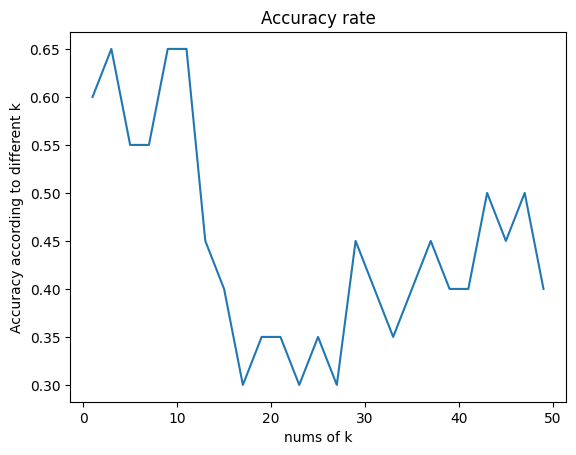

In [194]:
import matplotlib.pyplot as plt
k = [i for i in range(1,51,2)]
plt.plot(k, accur)
plt.xlabel('nums of k')
plt.ylabel('Accuracy according to different k')
plt.title('Accuracy rate')

plt.show()

In [176]:
# problem 2
# Step 1: Prepare
import pandas as pd
import numpy as np
df = pd.read_csv("HW1_data.csv")
name = [] # find name
dt = dict() # name and corresponding attribute
for i in range(len(df)):
    if df.loc[i][0] not in name:
        name.append(df.loc[i][0])
        
    if df.loc[i][0] not in dt:
        dt[df.loc[i][0]] = []
        dt[df.loc[i][0]].append((str(df.loc[i][1]),df.loc[i][2]))
    else:
        dt[df.loc[i][0]].append((str(df.loc[i][1]),df.loc[i][2]))

# 創建一个空的DataFrame
df = pd.DataFrame()
# 新增Name欄位
df['Name'] = pd.Series(name)

# 放入相對應的資料
for i,name in enumerate(name):
    for attr,val in dt[name]:
        if attr == 'Sex':
            df.loc[i, attr] = val
        else:
            df.loc[i,attr] = float(val)

# 調整欄位順序
df = df[['Name', 'Sex', 'Age', 'HR', 'Height', 'Weight', 'BP']]
df.fillna('')

,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37.0,80.0,165.0,72.0,131.0
1,Avery,F,66.0,72.0,159.0,54.0,121.0
2,Joseph,M,42.0,,168.0,70.0,110.0
3,Jackson,M,46.0,81.0,170.0,64.0,97.0
4,Nora,F,48.0,82.0,153.0,59.0,93.0
5,Aiden,M,38.0,93.0,166.0,69.0,136.0
6,Evelyn,F,60.0,67.0,168.0,60.0,106.0
7,Zoey,F,37.0,79.0,,,112.0
8,Matthew,M,69.0,85.0,166.0,70.0,128.0
9,Layla,F,12.0,87.0,156.0,47.0,142.0


In [210]:
# Step 2:
# 新增平均值，忽略缺失值（NaN）
column = ['Age', 'HR', 'Height', 'Weight', 'BP']
column_means = df[column].mean(skipna=True)
df.loc['Average'] = column_means

df.fillna('')

,Name,Sex,Age,HR,Height,Weight,BP
0,Daniel,M,37.00,80.0,165.0,72.0,131.0
1,Avery,F,66.00,72.0,159.0,54.0,121.0
2,Joseph,M,42.00,,168.0,70.0,110.0
3,Jackson,M,46.00,81.0,170.0,64.0,97.0
4,Nora,F,48.00,82.0,153.0,59.0,93.0
5,Aiden,M,38.00,93.0,166.0,69.0,136.0
6,Evelyn,F,60.00,67.0,168.0,60.0,106.0
7,Zoey,F,37.00,79.0,,,112.0
8,Matthew,M,69.00,85.0,166.0,70.0,128.0
9,Layla,F,12.00,87.0,156.0,47.0,142.0


In [228]:
# Step3: Maximum
cond = df['Age'] == df['Age'].max()
n = df.loc[cond].index
print("\"{:7s}\" has Maximum of Age    {:f}".format(df.loc[n,'Name'].values[0], df['Age'].max()))

cond = df['HR'] == df['HR'].max()
n = df.loc[cond].index
print("\"{:7s}\" has Maximum of HR     {:f}".format(df.loc[n,'Name'].values[0], df['HR'].max()))

cond = df['Height'] == df['Height'].max()
n = df.loc[cond].index
print("\"{:7s}\" has Maximum of Height {:f}".format(df.loc[n,'Name'].values[0], df['Height'].max()))

cond = df['Weight'] == df['Weight'].max()
n = df.loc[cond].index
print("\"{:7s}\" has Maximum of Weight {:f}".format(df.loc[n,'Name'].values[0], df['Weight'].max()))

cond = df['BP'] == df['BP'].max()
n = df.loc[cond].index
print("\"{:7s}\" has Maximum of BP     {:f}".format(df.loc[n,'Name'].values[0], df['BP'].max()))

"Madison" has Maximum of Age    74.000000
"Liam   " has Maximum of HR     94.000000
"Mason  " has Maximum of Height 186.000000
"Mason  " has Maximum of Weight 76.000000
"Lucas  " has Maximum of BP     148.000000


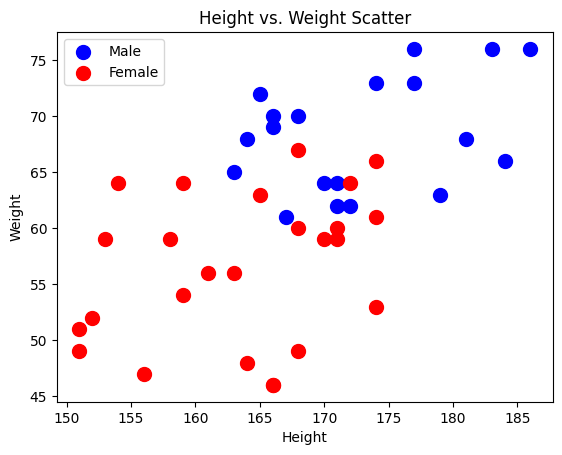

In [230]:
# Step 4:
# 散佈圖
from matplotlib import pyplot as plt

# 得到身高體重的數據
height = df['Height']
weight = df['Weight']
sex = df['Sex']

# 得到分別代表男生女生的index
male_index = sex[sex == 'M'].index
female_index = sex[sex == 'F'].index

# 繪製scatter
# color: 點點顏色
plt.scatter(height[male_index], weight[male_index], color='blue', label='Male', s=100)
plt.scatter(height[female_index], weight[female_index], color='red', label='Female', s=100)

# 添加圖例跟標籤
plt.legend()
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight Scatter')

# show
plt.show()

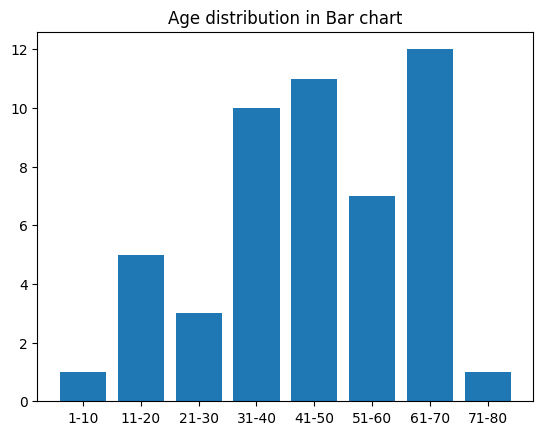

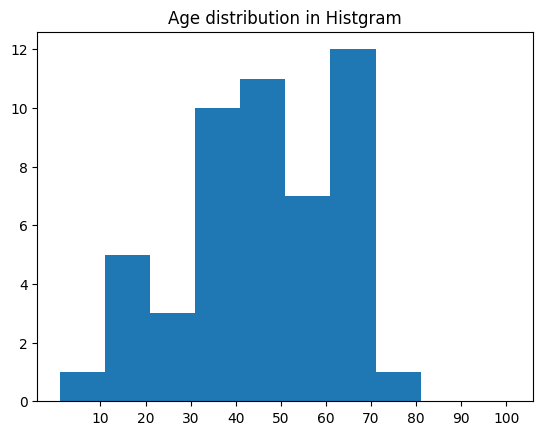

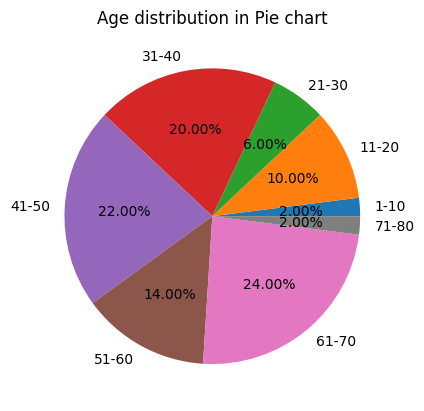

In [261]:
# Step 5:
# 長方圖 & 圓餅圖
from matplotlib import pyplot as plt

# Get all data first
age = sorted(df['Age'][:-1]) 
# 統計對應區間的人數
l = {'1-10':0, '11-20':0,'21-30':0,'31-40':0,'41-50':0,'51-60':0,'61-70':0,'71-80':0}
for i in age:
    if i<=10:
        l['1-10'] +=1
    elif i>10 and i<=20:
        l['11-20'] +=1
    elif i>20 and i<=30:
        l['21-30'] +=1
    elif i>30 and i<=40:
        l['31-40'] +=1
    elif i>40 and i<=50:
        l['41-50'] +=1
    elif i>50 and i<=60:
        l['51-60'] +=1
    elif i>60 and i<=70:
        l['61-70'] +=1
    elif i>70 and i<=80:
        l['71-80'] +=1

# 總人數
total = [l[i] for i in l]

# 長條圖
plt.title('Age distribution in Bar chart')
plt.bar( x = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'], height = total)
plt.show()

# 直方圖
plt.title('Age distribution in Histgram')
bins = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]
plt.hist(age, bins = bins)

# 更動 x 坐標軸
plt.xticks([10, 20, 30, 40, 50, 60, 70, 80, 90 , 100])
plt.show()

# 圓餅圖
plt.title('Age distribution in Pie chart')
plt.pie(total, labels = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']
       ,autopct='%.2f%%') # 顯示百分比)
plt.show()

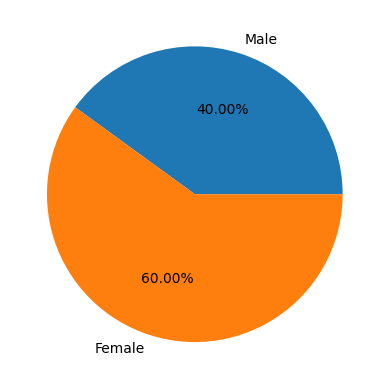

In [262]:
# Step 6:
# 性別比例分布圖
from matplotlib import pyplot as plt

sex = [len(male_index), len(female_index)]
plt.pie(sex, labels = ['Male', 'Female'],
        autopct='%.2f%%') # 顯示百分比
plt.show()